# Real data processing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline


## Sample data

[파일링크](https://drive.google.com/file/d/1SwIyvIc8U0T_JY8R1NVSmXEgRXZ4mSEk/view?usp=sharing)
### Bureau Of Economic Analysis data on the Gross Domestic Product of each US state from 1997 to 2020
[Reference](https://www.kaggle.com/davidbroberts/us-gdp-by-state-19972020)

Note: See the included footnote file.
SAGDP2N: Gross domestic product (GDP) by state 1/
Last updated: March 26, 2021-- new statistics for 2020.
Source: U.S. Department of Commerce / Bureau of Economic Analysis / Regional Economic Accounts

## EDA
- 저용량 데이터의 경우 Excel을 통해 일부 EDA, preprocessing 작업들을 진행하는 것이 좋음
- 고용량 데이터의 경우 Excel 사용이 사실상 불가능한 경우가 있으며, 이때는 이러한 방식으로 데이터를 탐색, 정리해 주어야 함

## 구글 드라이브 마운트
- 인증이 필요할 경우 인증 진행하면 됨

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 현재 경로 찾기

현재 파이썬은 리눅스 위에서 operation 중

`!` 리눅스 터미널에 명령어를 줄 수 있다.

`!pwd`
현재 디렉토리 확인

`!ls` 현재 디렉토리의 파일/폴더 리스트를 본다.

In [4]:
!pwd
!ls

/content
drive  sample_data  test.csv


In [5]:
df = pd.read_csv("/content/drive/MyDrive/통계분석_202202/test/SAGDP2N__ALL_AREAS_1997_2020.csv")
df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0,20936558.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,12564794.0,12731237.0,12403880.0,12884089.0,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0,18290860.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,144062.0,147244.0,129968.0,146299.0,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0,175802.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,115665.0,119476.0,103102.0,117629.0,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0,(NA)
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,28397.0,27768.0,26866.0,28670.0,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0,(NA)


In [6]:
df.tail(10)
# 데이터에 문제가 없는지 확인

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5518,"""98000""",Far West,8,SAGDP2N,87.0,"11, 21",Natural resources and mining,Millions of current dollars,40021.3,33635.0,34672.9,39054.9,36944.7,38177.6,44080.1,53596.8,60630.7,70374.2,81592.4,87581.8,72145.2,78847.4,90581.6,92601.8,91331.1,89302.4,71499.0,67341.9,73639.4,75530.1,73576.1,67554.2
5519,"""98000""",Far West,8,SAGDP2N,88.0,"42, 44-45",Trade,Millions of current dollars,194006.4,209026.9,218719.4,234837.1,238374.6,243523.8,255942.6,272344.2,293493.2,311949.0,317798.7,310959.2,290758.4,306038.9,322777.6,336736.0,355227.0,374147.0,400509.8,403823.2,423391.3,435665.6,462623.3,464777.6
5520,"""98000""",Far West,8,SAGDP2N,89.0,"22, 48-49",Transportation and utilities,Millions of current dollars,68505.6,70529.0,73433.9,77359.2,73970.8,78855.7,81984.4,89126.6,92135.6,105036.9,105324.9,106762.2,106213.7,114841.3,118476.5,120508.7,125869.3,132602.4,142351.0,151508.6,161271.6,172189.2,189817.3,170679.6
5521,"""98000""",Far West,8,SAGDP2N,90.0,"31-33, 51",Manufacturing and information,Millions of current dollars,296955.4,319341.4,361094.4,383468.2,357476.4,353194.7,373908.0,398769.7,437994.2,465470.5,498361.7,520100.5,491395.0,506083.7,515643.0,535530.9,586212.2,618307.5,671138.4,699937.9,753013.2,801925.5,839734.0,849532.8
5522,"""98000""",Far West,8,SAGDP2N,91.0,...,Private goods-producing industries 2/,Millions of current dollars,308331.2,319019.0,342259.9,387417.5,355880.3,344168.7,374210.9,414142.9,473289.5,511687.0,539867.8,538035.7,486769.9,483697.9,493509.5,515674.2,542474.8,566819.1,584587.0,590830.7,629723.0,670682.2,684935.3,666697.4
5523,"""98000""",Far West,8,SAGDP2N,92.0,...,Private services-providing industries 3/,Millions of current dollars,985596.4,1064211.3,1160608.6,1244783.3,1289426.5,1358322.0,1432417.9,1523846.3,1627249.6,1744284.5,1823004.0,1858706.0,1814117.2,1888391.4,1976062.0,2075109.3,2181136.7,2313170.7,2486666.3,2618453.8,2789660.2,2954243.6,3138895.7,3104513.5
5524,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5525,SAGDP2N: Gross domestic product (GDP) by state 1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5526,"Last updated: March 26, 2021-- new statistics ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5527,Source: U.S. Department of Commerce / Bureau o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 중 필요한 부분만 crop

### Footnote 제거 (row cropping)

In [7]:
df.index.to_list()[-4:] # 마지막 네줄의 index 확인

[5524, 5525, 5526, 5527]

In [8]:
df = df.drop(list(range(5524, 5528)), axis=0)
df = df.drop(columns=["2020"])

In [9]:
df.tail()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5519,"""98000""",Far West,8,SAGDP2N,88.0,"42, 44-45",Trade,Millions of current dollars,194006.4,209026.9,218719.4,234837.1,238374.6,243523.8,255942.6,272344.2,293493.2,311949.0,317798.7,310959.2,290758.4,306038.9,322777.6,336736.0,355227.0,374147.0,400509.8,403823.2,423391.3,435665.6,462623.3
5520,"""98000""",Far West,8,SAGDP2N,89.0,"22, 48-49",Transportation and utilities,Millions of current dollars,68505.6,70529.0,73433.9,77359.2,73970.8,78855.7,81984.4,89126.6,92135.6,105036.9,105324.9,106762.2,106213.7,114841.3,118476.5,120508.7,125869.3,132602.4,142351.0,151508.6,161271.6,172189.2,189817.3
5521,"""98000""",Far West,8,SAGDP2N,90.0,"31-33, 51",Manufacturing and information,Millions of current dollars,296955.4,319341.4,361094.4,383468.2,357476.4,353194.7,373908.0,398769.7,437994.2,465470.5,498361.7,520100.5,491395.0,506083.7,515643.0,535530.9,586212.2,618307.5,671138.4,699937.9,753013.2,801925.5,839734.0
5522,"""98000""",Far West,8,SAGDP2N,91.0,...,Private goods-producing industries 2/,Millions of current dollars,308331.2,319019.0,342259.9,387417.5,355880.3,344168.7,374210.9,414142.9,473289.5,511687.0,539867.8,538035.7,486769.9,483697.9,493509.5,515674.2,542474.8,566819.1,584587.0,590830.7,629723.0,670682.2,684935.3
5523,"""98000""",Far West,8,SAGDP2N,92.0,...,Private services-providing industries 3/,Millions of current dollars,985596.4,1064211.3,1160608.6,1244783.3,1289426.5,1358322.0,1432417.9,1523846.3,1627249.6,1744284.5,1823004.0,1858706.0,1814117.2,1888391.4,1976062.0,2075109.3,2181136.7,2313170.7,2486666.3,2618453.8,2789660.2,2954243.6,3138895.7


### Row cropping

In [10]:
# row crop
df[df["GeoName"] == "United States *"]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,12564794.0,12731237.0,12403880.0,12884089.0,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,144062.0,147244.0,129968.0,146299.0,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,115665.0,119476.0,103102.0,117629.0,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,28397.0,27768.0,26866.0,28670.0,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""00000""",United States *,,SAGDP2N,92.0,...,Private services-providing industries 3/,Millions of current dollars,5505852.0,5879652.0,6294648.0,6708892.0,7004793.0,7291922.0,7603492.0,8080255.0,8627087.0,9133235.0,9546697.0,9742095.0,9730289.0,10109815.0,10476263.0,11018673.0,11390765.0,11951380.0,12630266.0,13128956.0,13663384.0,14390257.0,15070376.0
92,"""00000""",United States *,,SAGDP2N,100.0,...,"All industry total, overseas activity",Millions of current dollars,66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
93,"""00000""",United States *,,SAGDP2N,101.0,...,"Government and government enterprises, oversea...",Millions of current dollars,66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
94,"""00000""",United States *,,SAGDP2N,102.0,...,"Federal civilian, overseas activity",Millions of current dollars,2897.0,3017.0,3064.0,3138.0,3325.0,3405.0,3762.0,3962.0,4008.0,3500.0,3167.0,3663.0,4126.0,4545.0,4710.0,4453.0,4487.0,4534.0,5176.0,5320.0,5412.0,5490.0,5582.0


In [11]:
dfc = df.loc[:95]

In [12]:
dfc

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,12564794.0,12731237.0,12403880.0,12884089.0,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,144062.0,147244.0,129968.0,146299.0,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,115665.0,119476.0,103102.0,117629.0,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,28397.0,27768.0,26866.0,28670.0,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""00000""",United States *,,SAGDP2N,92.0,...,Private services-providing industries 3/,Millions of current dollars,5505852.0,5879652.0,6294648.0,6708892.0,7004793.0,7291922.0,7603492.0,8080255.0,8627087.0,9133235.0,9546697.0,9742095.0,9730289.0,10109815.0,10476263.0,11018673.0,11390765.0,11951380.0,12630266.0,13128956.0,13663384.0,14390257.0,15070376.0
92,"""00000""",United States *,,SAGDP2N,100.0,...,"All industry total, overseas activity",Millions of current dollars,66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
93,"""00000""",United States *,,SAGDP2N,101.0,...,"Government and government enterprises, oversea...",Millions of current dollars,66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
94,"""00000""",United States *,,SAGDP2N,102.0,...,"Federal civilian, overseas activity",Millions of current dollars,2897.0,3017.0,3064.0,3138.0,3325.0,3405.0,3762.0,3962.0,4008.0,3500.0,3167.0,3663.0,4126.0,4545.0,4710.0,4453.0,4487.0,4534.0,5176.0,5320.0,5412.0,5490.0,5582.0


### Column Cropping

In [13]:
# column crop

dfc = dfc[["Description"] + [str(i) for i in range(1997, 2020)]]

# for 문으로 list 만들기
# list comprehenson https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

In [14]:
column_list = dfc.columns.to_list()
column_list

['Description',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

## 데이터 정리

### Tidy Data 만들기
- 시간 index 세로방향으로 쌓이게
- column index 가로방향으로 쌓이게

In [15]:
dfc

,Description,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,All industry total,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,Private industries,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,12564794.0,12731237.0,12403880.0,12884089.0,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,"Agriculture, forestry, fishing and hunting",108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,144062.0,147244.0,129968.0,146299.0,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0
3,Farms,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,115665.0,119476.0,103102.0,117629.0,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0
4,"Forestry, fishing, and related activities",20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,28397.0,27768.0,26866.0,28670.0,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Private services-providing industries 3/,5505852.0,5879652.0,6294648.0,6708892.0,7004793.0,7291922.0,7603492.0,8080255.0,8627087.0,9133235.0,9546697.0,9742095.0,9730289.0,10109815.0,10476263.0,11018673.0,11390765.0,11951380.0,12630266.0,13128956.0,13663384.0,14390257.0,15070376.0
92,"All industry total, overseas activity",66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
93,"Government and government enterprises, oversea...",66543.0,65892.0,65339.0,65917.0,66286.0,67598.0,72769.0,75969.0,79305.0,82666.0,86024.0,91384.0,98144.0,103915.0,111189.0,113234.0,113317.0,113771.0,111953.0,113124.0,113759.0,116757.0,119703.0
94,"Federal civilian, overseas activity",2897.0,3017.0,3064.0,3138.0,3325.0,3405.0,3762.0,3962.0,4008.0,3500.0,3167.0,3663.0,4126.0,4545.0,4710.0,4453.0,4487.0,4534.0,5176.0,5320.0,5412.0,5490.0,5582.0


In [16]:
dfc = dfc.transpose()

In [17]:
dfc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Description,All industry total,Private industries,"Agriculture, forestry, fishing and hunting",Farms,"Forestry, fishing, and related activities","Mining, quarrying, and oil and gas extraction",Oil and gas extraction,Mining (except oil and gas),Support activities for mining,Utilities,Construction,Manufacturing,Durable goods manufacturing,Wood product manufacturing,Nonmetallic mineral product manufacturing,Primary metal manufacturing,Fabricated metal product manufacturing,Machinery manufacturing,Computer and electronic product manufacturing,"Electrical equipment, appliance, and compo...","Motor vehicles, bodies and trailers, and p...",Other transportation equipment manufacturing,Furniture and related product manufacturing,Miscellaneous manufacturing,Nondurable goods manufacturing,Food and beverage and tobacco product manu...,Textile mills and textile product mills,"Apparel, leather, and allied product manuf...",Paper manufacturing,Printing and related support activities,Petroleum and coal products manufacturing,Chemical manufacturing,Plastics and rubber products manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Air transportation,Rail transportation,Water transportation,Truck transportation,...,Real estate,Rental and leasing services and lessors of...,Professional and business services,"Professional, scientific, and technical ser...",Legal services,Computer systems design and related services,"Miscellaneous professional, scientific, an...",Management of companies and enterprises,Administrative and support and waste manage...,Administrative and support services,Waste management and remediation services,"Educational services, health care, and socia...",Educational services,Health care and social assistance,Ambulatory health care services,Hospitals,Nursing and residential care facilities,Social assistance,"Arts, entertainment, recreation, accommodati...","Arts, entertainment, and recreation","Performing arts, spectator sports, museums...","Amusement, gambling, and recreation indust...",Accommodation and food services,Accommodation,Food services and drinking places,Other services (except government and govern...,Government and government enterprises,Federal civilian,Military,State and local,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2/,Private services-providing industries 3/,"All industry total, overseas activity","Government and government enterprises, oversea...","Federal civilian, overseas activity","Military, overseas activity"
1997,8577552.0,7431992.0,108637.0,88136.0,20501.0,95062.0,55060.0,26501.0,13500.0,171479.0,339552.0,1382889.0,823793.0,26791.0,39766.0,48074.0,110023.0,102233.0,195321.0,46856.0,112015.0,62539.0,27921.0,52255.0,559097.0,135203.0,27396.0,25165.0,55369.0,37438.0,47512.0,173408.0,57607.0,527539.0,579918.0,257255.0,54657.0,19966.0,6564.0,77138.0,...,929207.0,105961.0,840553.0,499682.0,103987.0,75488.0,320207.0,125467.0,215405.0,193546.0,21859.0,590585.0,77078.0,513507.0,250899.0,165219.0,57907.0,39483.0,301782.0,80141.0,37156.0,42984.0,221642.0,70738.0,150903.0,230311.0,1145563.0,221049.0,169677.0,754836.0,203698.0,1107456.0,428732.0,1776966.0,1926139.0,5505852.0,66543.0,66543.0,2897.0,63646.0
1998,9062817.0,7871500.0,99756.0,79030.0,20726.0,81692.0,39065.0,29004.0,13622.0,163685.0,379790.0,1430610.0,850712.0,27513.0,40841.0,48958.0,111691.0,113780.0,191746.0,40569.0,123851.0,66829.0,29655.0,55280.0,579897.0,140007.0,28085.0,23428.0,55857.0,39685.0,50116.0,180960.0,61760.0,563735.0,626912.0,279997.0,55170.0,22202.0,6479.0,85592.0,...,959173.0,112998.0,913999.0,543091.0,113731.0,88994.0,340367.0,139111.0,231797.0,209089.0,22708.0,615762.0,79943.0,535819.0,258580.0,173125

### index 재설정

In [18]:
dfc = dfc.reset_index()

In [19]:
dfc.columns = dfc.iloc[0]
dfc = dfc.drop(0)
dfc

,Description,All industry total,Private industries,"Agriculture, forestry, fishing and hunting",Farms,"Forestry, fishing, and related activities","Mining, quarrying, and oil and gas extraction",Oil and gas extraction,Mining (except oil and gas),Support activities for mining,Utilities,Construction,Manufacturing,Durable goods manufacturing,Wood product manufacturing,Nonmetallic mineral product manufacturing,Primary metal manufacturing,Fabricated metal product manufacturing,Machinery manufacturing,Computer and electronic product manufacturing,"Electrical equipment, appliance, and component manufacturing","Motor vehicles, bodies and trailers, and parts manufacturing",Other transportation equipment manufacturing,Furniture and related product manufacturing,Miscellaneous manufacturing,Nondurable goods manufacturing,Food and beverage and tobacco product manufacturing,Textile mills and textile product mills,"Apparel, leather, and allied product manufacturing",Paper manufacturing,Printing and related support activities,Petroleum and coal products manufacturing,Chemical manufacturing,Plastics and rubber products manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Air transportation,Rail transportation,Water transportation,...,Real estate,Rental and leasing services and lessors of nonfinancial intangible assets,Professional and business services,"Professional, scientific, and technical services",Legal services,Computer systems design and related services,"Miscellaneous professional, scientific, and technical services",Management of companies and enterprises,Administrative and support and waste management and remediation services,Administrative and support services,Waste management and remediation services,"Educational services, health care, and social assistance",Educational services,Health care and social assistance,Ambulatory health care services,Hospitals,Nursing and residential care facilities,Social assistance,"Arts, entertainment, recreation, accommodation, and food services","Arts, entertainment, and recreation","Performing arts, spectator sports, museums, and related activities","Amusement, gambling, and recreation industries",Accommodation and food services,Accommodation,Food services and drinking places,Other services (except government and government enterprises),Government and government enterprises,Federal civilian,Military,State and local,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2/,Private services-providing industries 3/,"All industry total, overseas activity","Government and government enterprises, overseas activity","Federal civilian, overseas activity","Military, overseas activity"
1,1997,8577552.0,7431992.0,108637.0,88136.0,20501.0,95062.0,55060.0,26501.0,13500.0,171479.0,339552.0,1382889.0,823793.0,26791.0,39766.0,48074.0,110023.0,102233.0,195321.0,46856.0,112015.0,62539.0,27921.0,52255.0,559097.0,135203.0,27396.0,25165.0,55369.0,37438.0,47512.0,173408.0,57607.0,527539.0,579918.0,257255.0,54657.0,19966.0,6564.0,...,929207.0,105961.0,840553.0,499682.0,103987.0,75488.0,320207.0,125467.0,215405.0,193546.0,21859.0,590585.0,77078.0,513507.0,250899.0,165219.0,57907.0,39483.0,301782.0,80141.0,37156.0,42984.0,221642.0,70738.0,150903.0,230311.0,1145563.0,221049.0,169677.0,754836.0,203698.0,1107456.0,428732.0,1776966.0,1926139.0,5505852.0,66543.0,66543.0,2897.0,63646.0
2,1998,9062817.0,7871500.0,99756.0,79030.0,20726.0,81692.0,39065.0,29004.0,13622.0,163685.0,379790.0,1430610.0,850712.0,27513.0,40841.0,48958.0,111691.0,113780.0,191746.0,40569.0,123851.0,66829.0,29655.0,55280.0,579897.0,140007.0,28085.0,23428.0,55857.0,39685.0,50116.0,180960.0,61760.0,563735.0,626912.0,279997.0,55170.0,22202.0,6479.0,...,959173.0,112998.0,913999.0,543091.0,113731.0,88994.0,340367.0,139111.0,231797.0,209089.0,22708.0,615762.0,79943.0,535819.0,258580.0,173125.0,61095.0,43018.0,322093.0,82845.0,40614.0,42231.0,239248.0,75678.0,163569.0,24873

## column 명 변경

In [20]:
dfc = dfc.rename(columns={"Description" : "year"})
dfc

,year,All industry total,Private industries,"Agriculture, forestry, fishing and hunting",Farms,"Forestry, fishing, and related activities","Mining, quarrying, and oil and gas extraction",Oil and gas extraction,Mining (except oil and gas),Support activities for mining,Utilities,Construction,Manufacturing,Durable goods manufacturing,Wood product manufacturing,Nonmetallic mineral product manufacturing,Primary metal manufacturing,Fabricated metal product manufacturing,Machinery manufacturing,Computer and electronic product manufacturing,"Electrical equipment, appliance, and component manufacturing","Motor vehicles, bodies and trailers, and parts manufacturing",Other transportation equipment manufacturing,Furniture and related product manufacturing,Miscellaneous manufacturing,Nondurable goods manufacturing,Food and beverage and tobacco product manufacturing,Textile mills and textile product mills,"Apparel, leather, and allied product manufacturing",Paper manufacturing,Printing and related support activities,Petroleum and coal products manufacturing,Chemical manufacturing,Plastics and rubber products manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Air transportation,Rail transportation,Water transportation,...,Real estate,Rental and leasing services and lessors of nonfinancial intangible assets,Professional and business services,"Professional, scientific, and technical services",Legal services,Computer systems design and related services,"Miscellaneous professional, scientific, and technical services",Management of companies and enterprises,Administrative and support and waste management and remediation services,Administrative and support services,Waste management and remediation services,"Educational services, health care, and social assistance",Educational services,Health care and social assistance,Ambulatory health care services,Hospitals,Nursing and residential care facilities,Social assistance,"Arts, entertainment, recreation, accommodation, and food services","Arts, entertainment, and recreation","Performing arts, spectator sports, museums, and related activities","Amusement, gambling, and recreation industries",Accommodation and food services,Accommodation,Food services and drinking places,Other services (except government and government enterprises),Government and government enterprises,Federal civilian,Military,State and local,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2/,Private services-providing industries 3/,"All industry total, overseas activity","Government and government enterprises, overseas activity","Federal civilian, overseas activity","Military, overseas activity"
1,1997,8577552.0,7431992.0,108637.0,88136.0,20501.0,95062.0,55060.0,26501.0,13500.0,171479.0,339552.0,1382889.0,823793.0,26791.0,39766.0,48074.0,110023.0,102233.0,195321.0,46856.0,112015.0,62539.0,27921.0,52255.0,559097.0,135203.0,27396.0,25165.0,55369.0,37438.0,47512.0,173408.0,57607.0,527539.0,579918.0,257255.0,54657.0,19966.0,6564.0,...,929207.0,105961.0,840553.0,499682.0,103987.0,75488.0,320207.0,125467.0,215405.0,193546.0,21859.0,590585.0,77078.0,513507.0,250899.0,165219.0,57907.0,39483.0,301782.0,80141.0,37156.0,42984.0,221642.0,70738.0,150903.0,230311.0,1145563.0,221049.0,169677.0,754836.0,203698.0,1107456.0,428732.0,1776966.0,1926139.0,5505852.0,66543.0,66543.0,2897.0,63646.0
2,1998,9062817.0,7871500.0,99756.0,79030.0,20726.0,81692.0,39065.0,29004.0,13622.0,163685.0,379790.0,1430610.0,850712.0,27513.0,40841.0,48958.0,111691.0,113780.0,191746.0,40569.0,123851.0,66829.0,29655.0,55280.0,579897.0,140007.0,28085.0,23428.0,55857.0,39685.0,50116.0,180960.0,61760.0,563735.0,626912.0,279997.0,55170.0,22202.0,6479.0,...,959173.0,112998.0,913999.0,543091.0,113731.0,88994.0,340367.0,139111.0,231797.0,209089.0,22708.0,615762.0,79943.0,535819.0,258580.0,173125.0,61095.0,43018.0,322093.0,82845.0,40614.0,42231.0,239248.0,75678.0,163569.0,248732.0,119

### 데이터 형식 지정
- 데이터의 형식 (int, str, float 등)을 인식하지 못하는 경우
- Data operation, 파일 reading 중에 데이터 형식이 object로 바뀌는 경우 다수
- 마지막 부분에서 필요한 데이터 타입으로 변환해주어야 한다.


In [21]:
dfc.dtypes
dfc.dtypes.to_list()

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),

In [22]:
column_list_dtype_float = dfc.columns.to_list()
column_list_dtype_float = column_list_dtype_float[1:]
column_list_dtype_float

['All industry total',
 ' Private industries',
 '  Agriculture, forestry, fishing and hunting',
 '   Farms',
 '   Forestry, fishing, and related activities',
 '  Mining, quarrying, and oil and gas extraction',
 '   Oil and gas extraction',
 '   Mining (except oil and gas)',
 '   Support activities for mining',
 '  Utilities',
 '  Construction',
 '  Manufacturing',
 '   Durable goods manufacturing',
 '    Wood product manufacturing',
 '    Nonmetallic mineral product manufacturing',
 '    Primary metal manufacturing',
 '    Fabricated metal product manufacturing',
 '    Machinery manufacturing',
 '    Computer and electronic product manufacturing',
 '    Electrical equipment, appliance, and component manufacturing',
 '    Motor vehicles, bodies and trailers, and parts manufacturing',
 '    Other transportation equipment manufacturing',
 '    Furniture and related product manufacturing',
 '    Miscellaneous manufacturing',
 '   Nondurable goods manufacturing',
 '    Food and beverage and

In [23]:
dfc["year"] = dfc["year"].astype(int)
dfc[column_list_dtype_float] = dfc[column_list_dtype_float].astype(float)

In [24]:
dfc["All industry total"]

1      8577552.0
2      9062817.0
3      9630663.0
4     10252347.0
5     10581822.0
6     10936418.0
7     11458246.0
8     12213730.0
9     13036637.0
10    13814609.0
11    14451860.0
12    14712845.0
13    14448932.0
14    14992052.0
15    15542582.0
16    16197007.0
17    16784851.0
18    17527258.0
19    18238301.0
20    18745075.0
21    19542980.0
22    20611861.0
23    21433226.0
Name: All industry total, dtype: float64

### plot 출력

<Figure size 720x720 with 0 Axes>

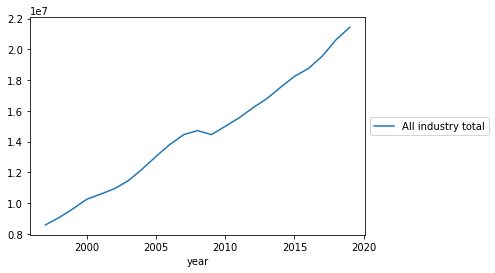

In [25]:
fig = plt.figure(figsize=(10, 10))
dfc.plot(x="year", y= 'All industry total')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Linear Regression 적용

### input/output, 모델 선택

In [26]:
predictors = ["year"]
outcome = "All industry total"

model = LinearRegression()
model.fit(dfc[predictors].values, dfc[outcome].values) # input: numpy arrary로 변환하여 넣어준다.

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: -1095946475.5691698
Coefficient: [552995.89920949]


In [27]:
fitted = model.predict(dfc[predictors].values)
residuals = dfc[outcome].values - fitted

### plot 출력

<Figure size 432x288 with 0 Axes>

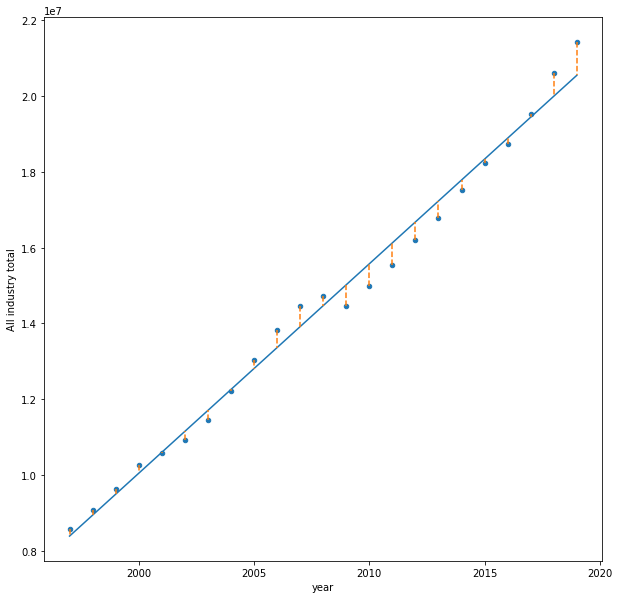

In [28]:
plt.figure()
ax = dfc.plot.scatter(x='year', y='All industry total', figsize=(10, 10))
ax.plot(dfc.year, fitted)
for x, yactual, yfitted in zip(dfc.year, dfc["All industry total"].values, fitted):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.show()

### Performance 확인

In [29]:
fitted = model.predict(dfc[predictors].values)
RMSE = np.sqrt(mean_squared_error(dfc[outcome].values, fitted))
r2 = r2_score(dfc[outcome].values, fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 391925
r2: 0.9887


# Multivariable Linear Regression


### input/output, 모델 변경

In [30]:
# 1st trial

predictors = ['   Durable goods manufacturing', "   Nondurable goods manufacturing", "Natural resources and mining"]

# 2nd trial
# predictors = ['   Durable goods manufacturing', "   Nondurable goods manufacturing"]

outcome = '  Mining, quarrying, and oil and gas extraction'

model_multi = LinearRegression()
model_multi.fit(dfc[predictors].values, dfc[outcome].values)

print(f'Intercept: {model_multi.intercept_:}')
print('Coefficients:')
for name, coef in zip(predictors, model_multi.coef_):
    print(f' {name}: {coef}')

Intercept: 3260.162571366556
Coefficients:
    Durable goods manufacturing: -0.10120858791299829
    Nondurable goods manufacturing: 0.03699923217646994
 Natural resources and mining: 0.8072889920273323


## performance 확인

In [31]:
fitted = model_multi.predict(dfc[predictors].values)
RMSE = np.sqrt(mean_squared_error(dfc[outcome].values, fitted))
r2 = r2_score(dfc[outcome].values, fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 11936
r2: 0.9875
